In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("E://python")

In [2]:
tr_ins = pd.read_csv("Train_Ins.csv")
te_ins = pd.read_csv("Test_Ins.csv")

In [3]:
tr_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [4]:
np.unique(tr_ins['labels'],return_counts=True)

(array([0, 1], dtype=int64), array([29941,  3967], dtype=int64))

In [5]:
tr_ins.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [6]:
import seaborn as sns

In [7]:
#sns.pairplot(tr_ins)

In [8]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split

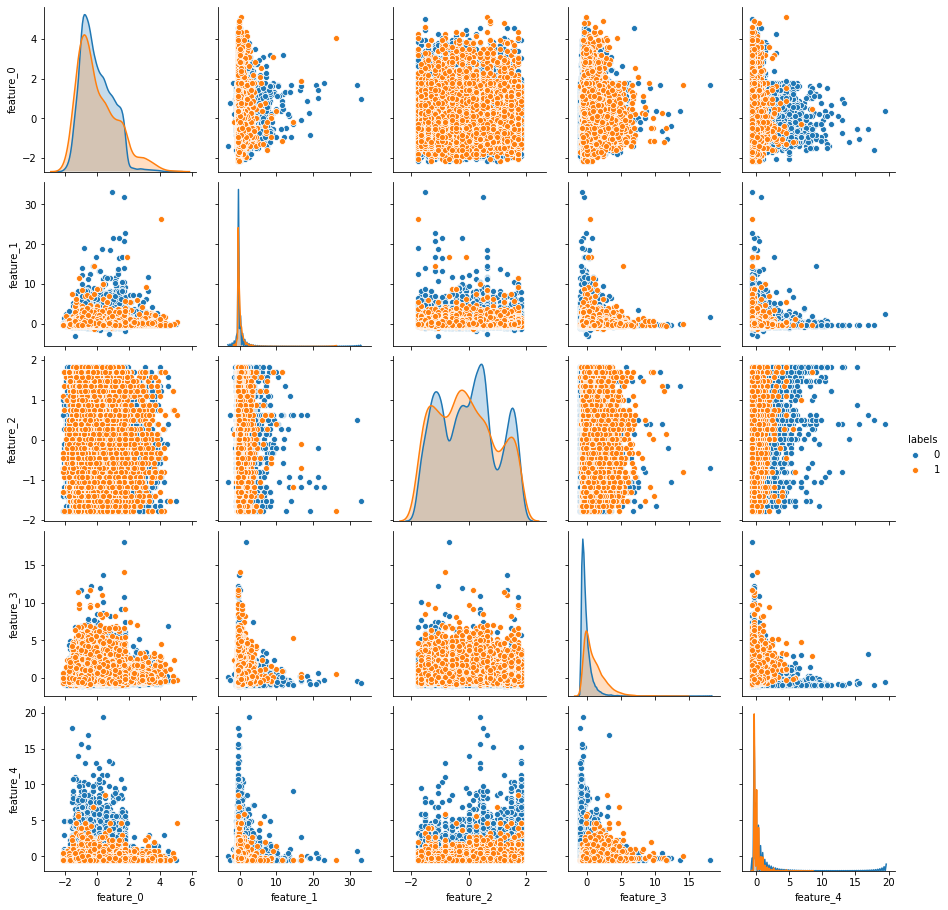

In [15]:
sns.pairplot(data=tr_ins[['feature_0','feature_1','feature_2','feature_3','feature_4','labels']],hue='labels',diag_kind='kde')

In [37]:
X = tr_ins.drop(['feature_0','feature_1','feature_4','feature_8','feature_6','feature_7','feature_9','feature_10','feature_12','labels'],axis='columns')

In [38]:
y = tr_ins.labels

In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn import metrics as me

In [58]:
rf = RandomForestClassifier()

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
rf_pred = rf.predict(X_test)

In [63]:
me.accuracy_score(y_test,rf_pred)

0.9006192863462106

In [47]:
from lightgbm import LGBMClassifier

In [48]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score

In [49]:
cv = StratifiedKFold(n_splits = 10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_Score','test_score'])
score_avg = []
for (train,test), i in zip(cv.split(X,y),range(10)):
    m = LGBMClassifier(n_jobs=-1,random_state=22,scale_pos_weight=3,learning_rate=0.1,n_estimators=100,colsample_bytree=0.5,
                       num_leaves=70,min_child_samples=20,lambda_l1=1.6,lambda_l2=4)
    m.fit(X_train,y_train)
    score_avg.append(f1_score(y_pred=m.predict(X_test),y_true = y_test))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.670135
1  0.670135
2  0.670135
3  0.670135
4  0.670135
5  0.670135
6  0.670135
7  0.670135
8  0.670135
9  0.670135
0.6701352757544223


In [51]:
xgb = XGBClassifier()

In [53]:
cv = StratifiedKFold(n_splits = 5,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_Score','test_score'])
score_avg = []
for (train,test), i in zip(cv.split(X,y),range(10)):
    m = XGBClassifier()
    m.fit(X_train,y_train)
    score_avg.append(f1_score(y_pred=m.predict(X_test),y_true = y_test))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.587517
1  0.587517
2  0.587517
3  0.587517
4  0.587517
0.587516960651289


In [54]:
lg = LGBMClassifier()

In [55]:
lg.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
lg_pred = lg.predict(X_test)

In [65]:
me.accuracy_score(y_test,lg_pred)

0.9087289884989679

In [72]:
lg.predict_proba(X_test)

array([[9.74862506e-01, 2.51374938e-02],
       [1.99327193e-01, 8.00672807e-01],
       [5.96541890e-01, 4.03458110e-01],
       ...,
       [9.99069552e-01, 9.30447652e-04],
       [8.69427478e-01, 1.30572522e-01],
       [9.34196433e-01, 6.58035671e-02]])

In [71]:
m.predict_proba(X_test)

array([[9.7686994e-01, 2.3130031e-02],
       [1.0182303e-01, 8.9817697e-01],
       [4.9660575e-01, 5.0339425e-01],
       ...,
       [9.9982095e-01, 1.7907987e-04],
       [8.8444960e-01, 1.1555043e-01],
       [9.3223459e-01, 6.7765407e-02]], dtype=float32)